In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_red = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
data_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


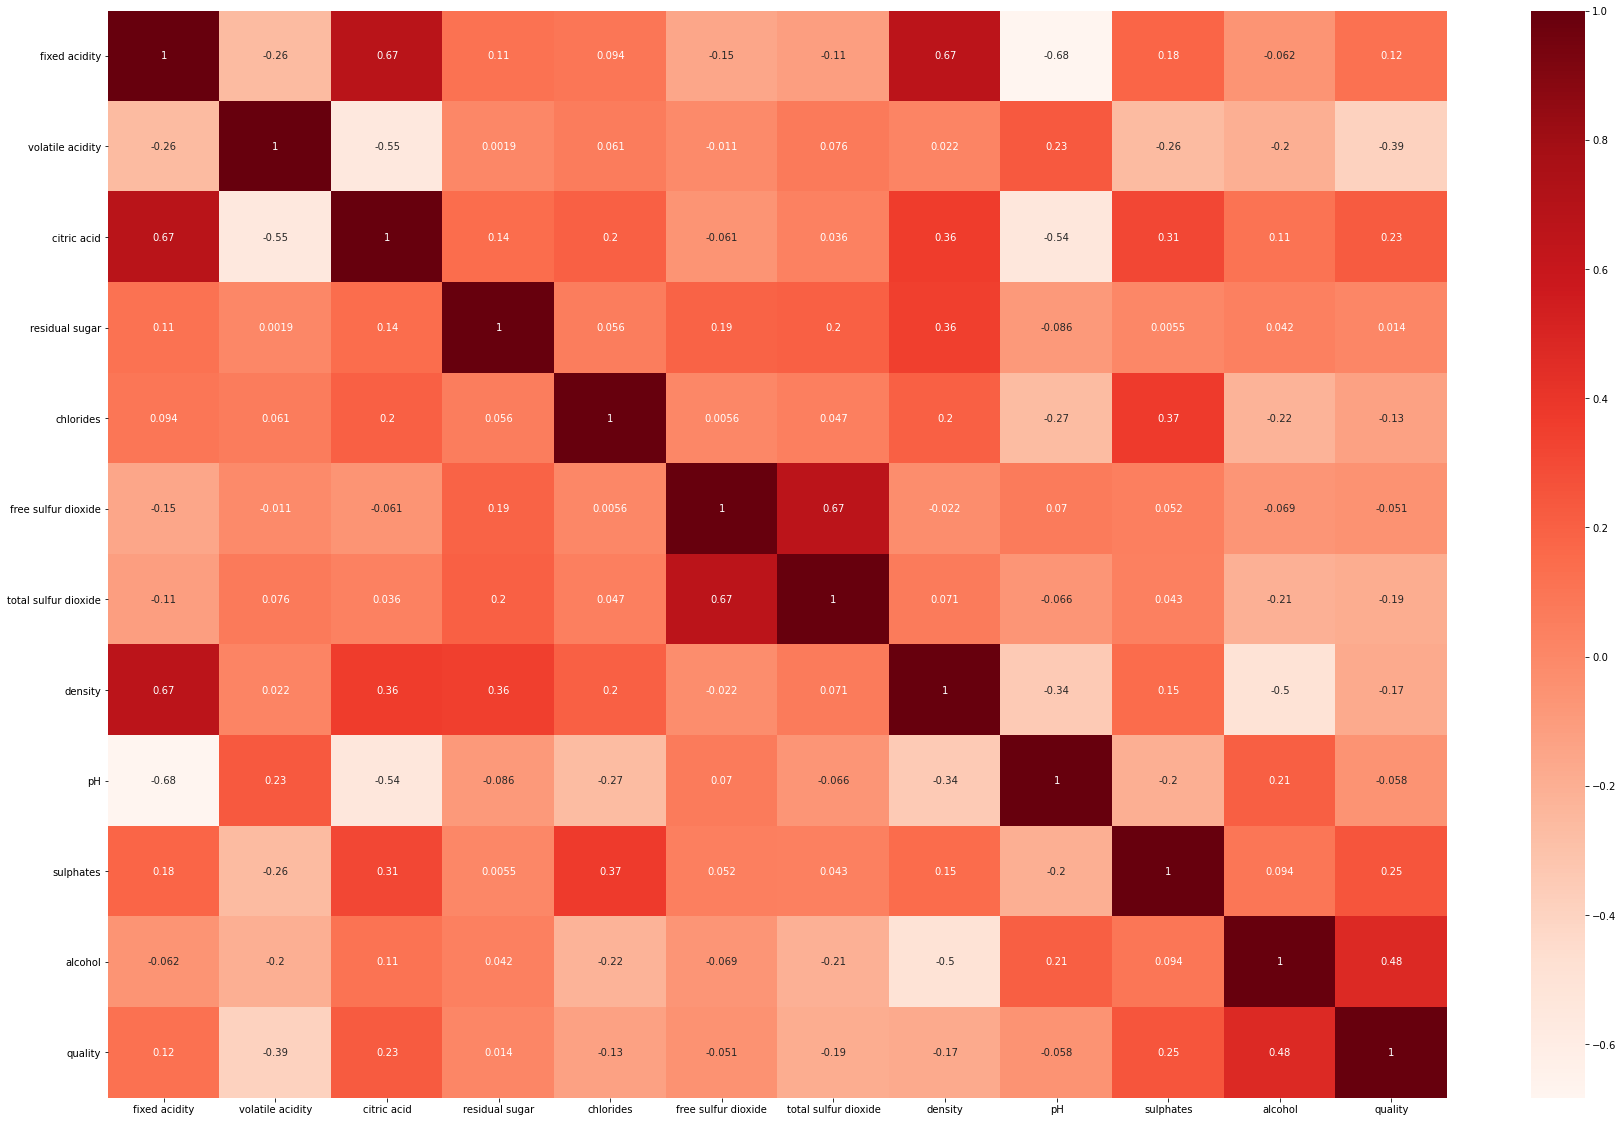

In [4]:
plt.figure(figsize=(30,20))
cor = data_red.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Count'>

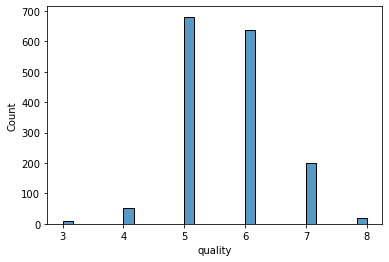

In [5]:
sns.histplot(data_red['quality'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

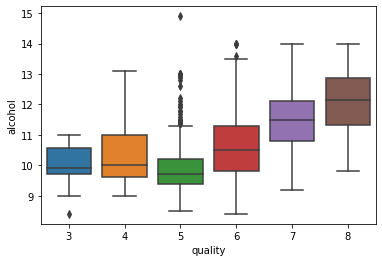

In [6]:
sns.boxplot(x=data_red['quality'],y=data_red['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

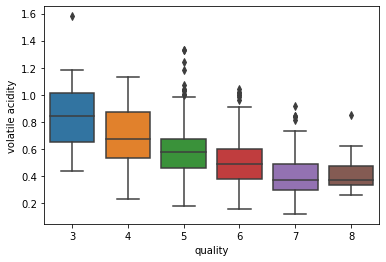

In [7]:
sns.boxplot(x=data_red['quality'],y=data_red['volatile acidity'])

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

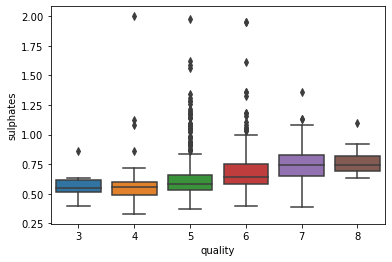

In [8]:
sns.boxplot(x=data_red['quality'],y=data_red['sulphates'])

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

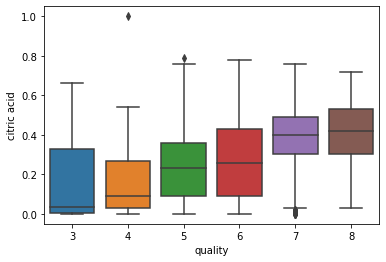

In [9]:
sns.boxplot(x=data_red['quality'],y=data_red['citric acid'])

<AxesSubplot:xlabel='quality', ylabel='density'>

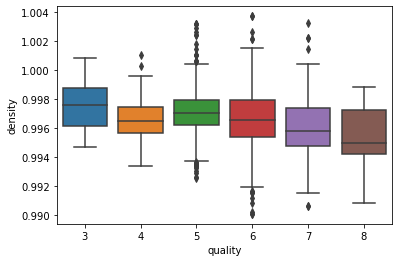

In [10]:
sns.boxplot(x=data_red['quality'],y=data_red['density'])

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

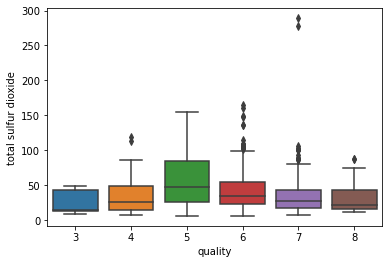

In [11]:
sns.boxplot(x=data_red['quality'],y=data_red['total sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

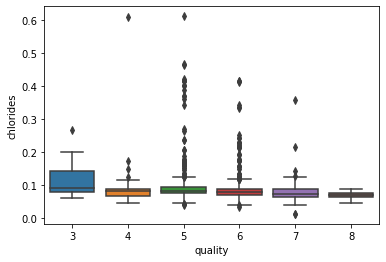

In [12]:
sns.boxplot(x=data_red['quality'],y=data_red['chlorides'])

In [13]:
data_x = data_red.copy()
data_x = data_x.drop(['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'pH', 'quality'], axis=1)
data_x

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
1,0.880,0.00,0.098,67.0,0.99680,0.68,9.8
2,0.760,0.04,0.092,54.0,0.99700,0.65,9.8
3,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,44.0,0.99490,0.58,10.5
1595,0.550,0.10,0.062,51.0,0.99512,0.76,11.2
1596,0.510,0.13,0.076,40.0,0.99574,0.75,11.0
1597,0.645,0.12,0.075,44.0,0.99547,0.71,10.2


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [15]:
y = data_red['quality']

In [16]:
scaler = StandardScaler()
scaler.fit(data_x)
x_scaled = scaler.transform(data_x)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.8,shuffle=True,random_state=42)

In [18]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
reg.score(x_train,y_train)
#R²

0.33929616973331334

In [20]:
reg.score(x_test,y_test)
#R²

0.39501047463640615

In [21]:
reg.coef_

array([-0.18369745,  0.01384836, -0.08142235, -0.08391534,  0.00957553,
        0.14482483,  0.29742392])

In [22]:
reg.intercept_

5.628433171411538

In [23]:
reg_tabela = pd.DataFrame([['Bias'],['volatile acidity'],['citric acid'],['chlorides'],['total sulfur dioxide'],['density'],['sulphates'],['alcohol']],columns=['Features'])
reg_tabela

,Features
0,Bias
1,volatile acidity
2,citric acid
3,chlorides
4,total sulfur dioxide
5,density
6,sulphates
7,alcohol


In [24]:
reg_tabela['Weights'] = reg.intercept_,reg.coef_[0],reg.coef_[1],reg.coef_[2],reg.coef_[3],reg.coef_[4],reg.coef_[5],reg.coef_[6]

In [25]:
reg_tabela

,Features,Weights
0,Bias,5.628433
1,volatile acidity,-0.183697
2,citric acid,0.013848
3,chlorides,-0.081422
4,total sulfur dioxide,-0.083915
5,density,0.009576
6,sulphates,0.144825
7,alcohol,0.297424


In [26]:
reg_tabela.sort_values('Weights',ascending=False)

,Features,Weights
0,Bias,5.628433
7,alcohol,0.297424
6,sulphates,0.144825
2,citric acid,0.013848
5,density,0.009576
3,chlorides,-0.081422
4,total sulfur dioxide,-0.083915
1,volatile acidity,-0.183697


In [30]:
reg_tabela.to_excel('regressao_red_wine.xlsx')